# Project2 : 붓꽃 분류

## 1. 데이터셋
+ seaborn에서는 붓꽃에 대한 데이터를 제공함
+ 붓꽃의 품종에 영향을 미치는 요인은 무엇인지 파악하고, 모델 학습을 통해 품종을 예측하고자 함


# 2.데이터 확인 및 전처리

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#데이터 불러오기
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
#데이터 전처리:결측값 확인
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## 3.학습/평가 데이터 분할
+ 학습 데이터와 평가 데이터를 8:2 비율로 분할

In [5]:
X=df.drop(columns='species')   # feature
y=df['species'] # target
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## 4.데이터 탐색

In [6]:
X_train.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,120.000000,120.000000,120.000000,120.000000
mean,5.809167,3.061667,3.726667,1.183333
std,0.823805,0.449123,1.752345,0.752289
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.500000,0.300000
50%,5.750000,3.000000,4.250000,1.300000
75%,6.400000,3.400000,5.100000,1.800000
max,7.700000,4.400000,6.700000,2.500000


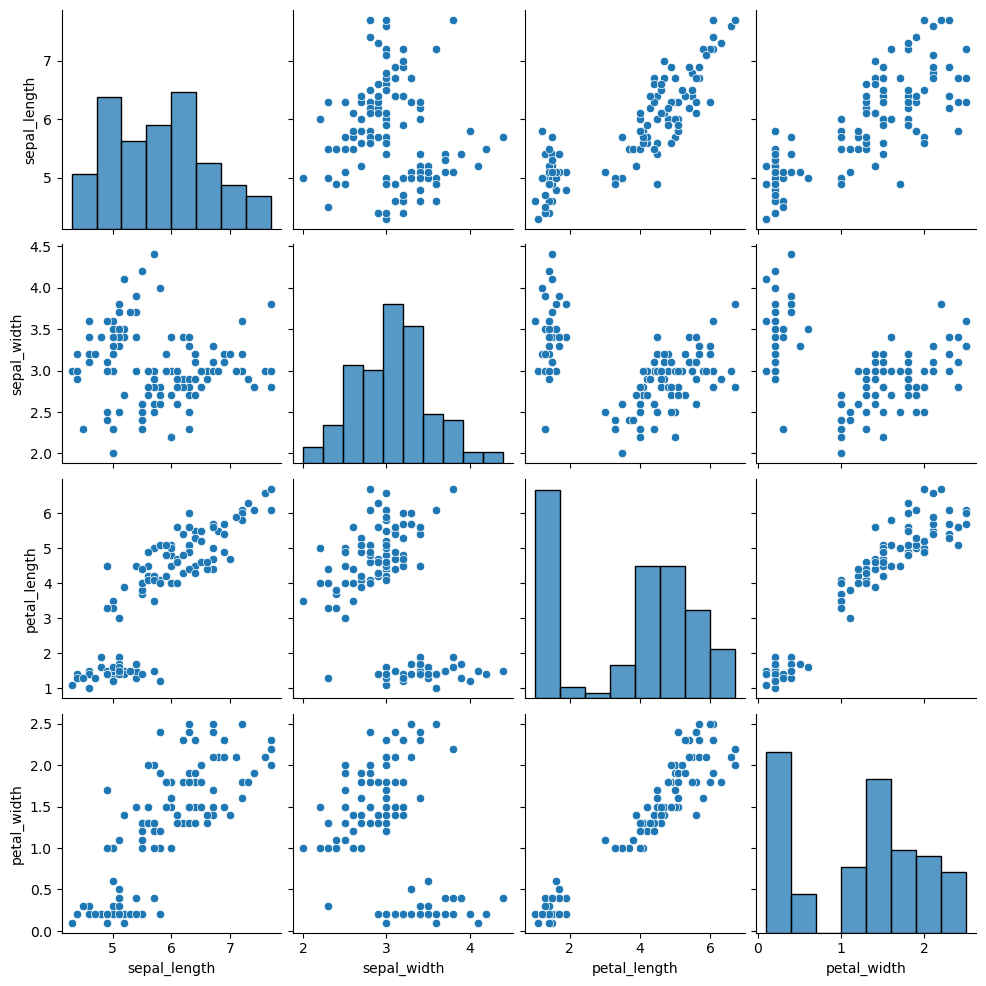

In [7]:
sns.pairplot(X_train)
plt.show()
# 산점도

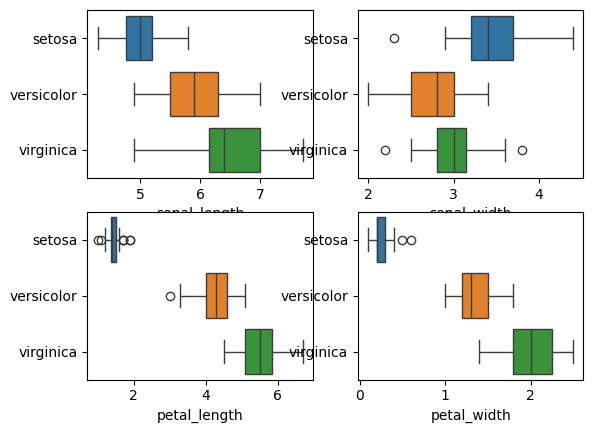

In [8]:
#상자수염 그래프
df_train=pd.concat([X_train,y_train],axis=1)

for i, feature in enumerate(X_train.columns):
    plt.subplot(2,2,i+1)
    sns.boxplot(y='species',x=feature, hue ='species',data=df_train)
    plt.ylabel('')
plt.show()

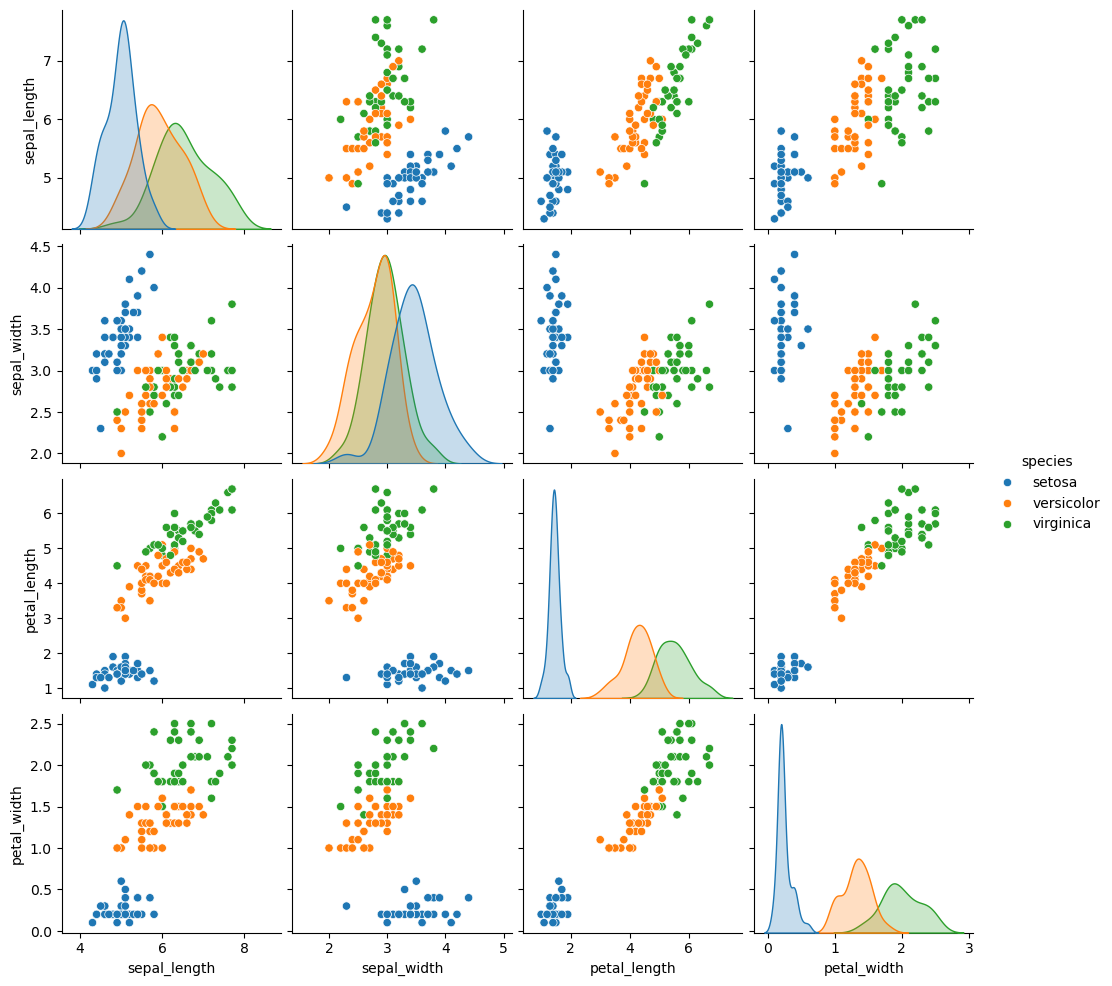

In [9]:
# 산점도
sns.pairplot(df_train,  hue ='species')
plt.show()

# 5. 분류모델 학습

In [10]:
#최적의 k 값 선택
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

k_range = range(1, 97)
k_scores=[]

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
    print(f'k={k}일때 정확도 : {scores.mean(): .3f}')

k=1일때 정확도 :  0.950
k=2일때 정확도 :  0.950
k=3일때 정확도 :  0.958
k=4일때 정확도 :  0.950
k=5일때 정확도 :  0.942
k=6일때 정확도 :  0.942
k=7일때 정확도 :  0.942
k=8일때 정확도 :  0.933
k=9일때 정확도 :  0.933
k=10일때 정확도 :  0.933
k=11일때 정확도 :  0.950
k=12일때 정확도 :  0.942
k=13일때 정확도 :  0.942
k=14일때 정확도 :  0.942
k=15일때 정확도 :  0.942
k=16일때 정확도 :  0.942
k=17일때 정확도 :  0.942
k=18일때 정확도 :  0.942
k=19일때 정확도 :  0.942
k=20일때 정확도 :  0.942
k=21일때 정확도 :  0.950
k=22일때 정확도 :  0.925
k=23일때 정확도 :  0.933
k=24일때 정확도 :  0.917
k=25일때 정확도 :  0.942
k=26일때 정확도 :  0.933
k=27일때 정확도 :  0.942
k=28일때 정확도 :  0.933
k=29일때 정확도 :  0.933
k=30일때 정확도 :  0.917
k=31일때 정확도 :  0.908
k=32일때 정확도 :  0.900
k=33일때 정확도 :  0.892
k=34일때 정확도 :  0.908
k=35일때 정확도 :  0.892
k=36일때 정확도 :  0.900
k=37일때 정확도 :  0.900
k=38일때 정확도 :  0.917
k=39일때 정확도 :  0.917
k=40일때 정확도 :  0.908
k=41일때 정확도 :  0.900
k=42일때 정확도 :  0.908
k=43일때 정확도 :  0.900
k=44일때 정확도 :  0.883
k=45일때 정확도 :  0.908
k=46일때 정확도 :  0.883
k=47일때 정확도 :  0.892
k=48일때 정확도 :  0.892
k=49일때 정확도 :  0.892
k=50일때 정확도 :  0.883
k=51일때 정확

In [11]:
# 모델 성능이 가장 좋은 k 값 선택
best_k = k_range[k_scores.index(max(k_scores))]
print(f"최적의 k 값은 {best_k}이며, 평균 정확도는 {max(k_scores):.3f}")

최적의 k 값은 3이며, 평균 정확도는 0.958


In [12]:
# K-NN 분류모델 생성 및 학습
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train,y_train)

#학습 데이터로 학습한  회귀모델에 평가데이터를 입력하여 클래스 분류
y_pred = knn.predict(X_test)


#분류모델 평가 : 정확도, 정밀도, 재현도
from sklearn.metrics import accuracy_score, precision_score, recall_score
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')

print(f"정확도 : {accuracy:.3f}")
print(f"정밀도 : {accuracy:.3f}")
print(f"재현도 : {accuracy:.3f}")

정확도 : 1.000
정밀도 : 1.000
재현도 : 1.000
